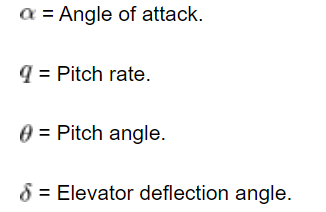

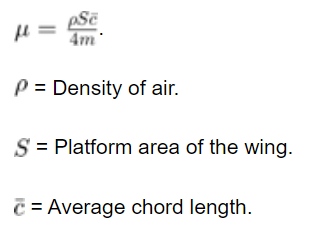

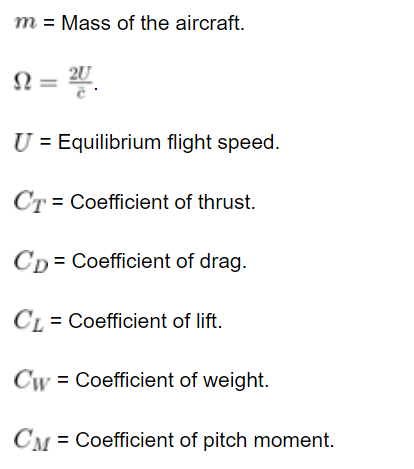

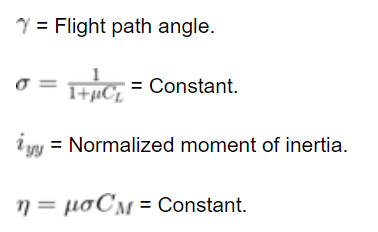

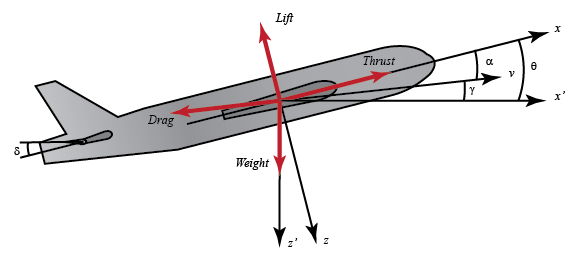

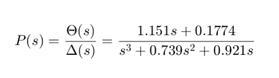

block diagram of the system:

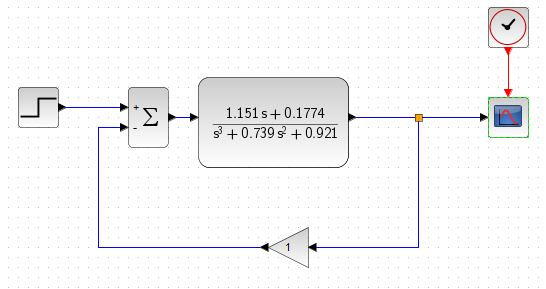

response of the system without controller:

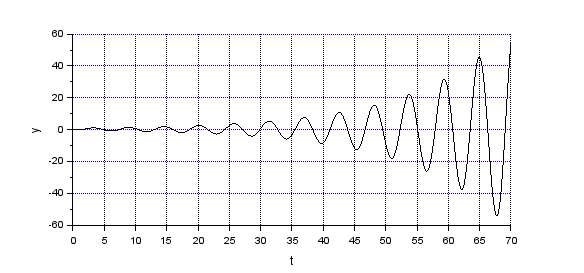

Pole zero plot of the system:

**code in simulink:**

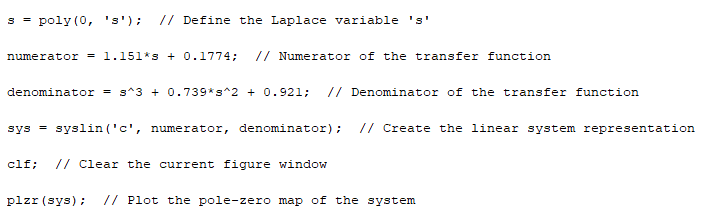

**Root locus of the system:**

**Code:**

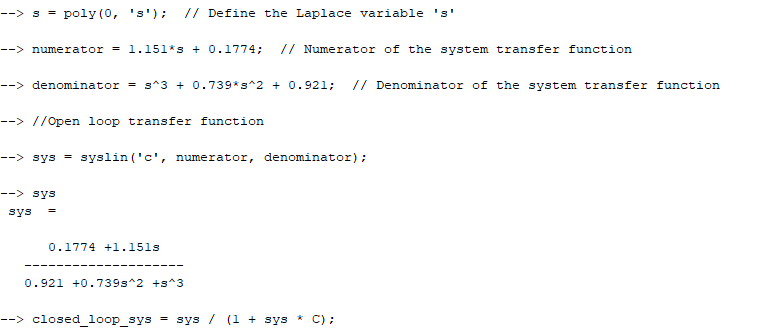

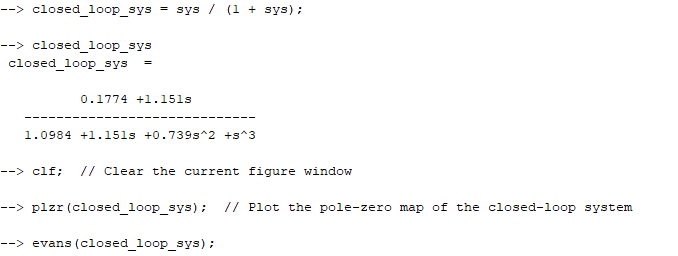

Block diagram of the system with controller:

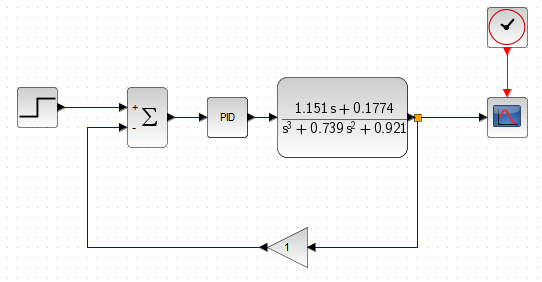

In [ ]:
import numpy as np
import scipy.signal as signal
import pandas as pd

In [ ]:
# Define the closed-loop system transfer function
num = [1.151,0.1774]
den = [1, 0.739, 0.921,0]
sys = signal.TransferFunction(num, den)

In [ ]:
sys

TransferFunctionContinuous(
array([1.151 , 0.1774]),
array([1.   , 0.739, 0.921, 0.   ]),
dt: None
)

In [ ]:
# Initialize the probability tables for Kp, Ki, and Kd
Kp_probabilities = np.array([0.25, 0.25, 0.25, 0.25])  # Probability distribution for Kp values
Ki_probabilities = np.array([0.25, 0.25, 0.25, 0.25])  # Probability distribution for Ki values
Kd_probabilities = np.array([0.25, 0.25, 0.25, 0.25])  # Probability distribution for Kd values

In [ ]:
# Number of iterations and learning rate
num_iterations = 1000  # Total number of iterations for SLA algorithm
learning_rate = 0.1  # Learning rate for updating probability tables

In [ ]:
# Initialize the gains randomly within the provided ranges
Kp_range = [0, 10]  # Range of possible Kp values
Ki_range = [0, 10]  # Range of possible Ki values
Kd_range = [0, 10]  # Range of possible Kd values

In [ ]:
# Ask the user for the number of repetitions
num_repetitions = int(input("Enter the number of repetitions: "))

Enter the number of repetitions: 10


In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=["Kp", "Ki", "Kd"])

In [ ]:
# SLA Algorithm
for _ in range(num_repetitions):
    # Initialize the gains randomly within the range
    Kp = np.random.uniform(Kp_range[0], Kp_range[1])
    Ki = np.random.uniform(Ki_range[0], Ki_range[1])
    Kd = np.random.uniform(Kd_range[0], Kd_range[1])

    for _ in range(num_iterations):
        # Calculate the cost for the current gains
        sys_with_gains = signal.TransferFunction([Kp * 1.151, Kp * 0.1774], [1, 0.739, 0.921 + Ki, 0 + Kd])
        t, y = signal.step(sys_with_gains)
        #By executing this line of code, the step response of the system described by sys_with_gains is computed,
        # and the resulting time points and output values are stored in the variables t and y, respectively.
        error = np.sum(np.abs(y - 1))  # Calculate the error by comparing the system response to a step input

        # Update the probability tables based on the error
        #Kp_probabilities=Kp_probabilities⋅(1−learning_rate)+(learning_rate⋅(error==np.min(error)))
        Kp_probabilities = Kp_probabilities * (1 - learning_rate) + (learning_rate * (error == np.min(error)))
        Ki_probabilities = Ki_probabilities * (1 - learning_rate) + (learning_rate * (error == np.min(error)))
        Kd_probabilities = Kd_probabilities * (1 - learning_rate) + (learning_rate * (error == np.min(error)))
        # Kp_probabilities * (1 - learning_rate): This part decreases the existing probabilities in Kp_probabilities
        #   by multiplying them with the complement of the learning rate (i.e., 1 - learning_rate).
        #      This step essentially reduces the influence of the existing probabilities.
        #
        # (learning_rate * (error == np.min(error))): Here, the error values that are equal to the
        #      minimum error are identified by the expression (error == np.min(error)).
        #        This expression evaluates to an array of boolean values where True represents
        #           the positions where the condition is met, and False otherwise.
        #              Then, the learning rate is multiplied element-wise with this boolean
        #                   array to create an array with the same shape as Kp_probabilities.

        # Normalize the probability tables , so sum of all of them
        Kp_probabilities /= np.sum(Kp_probabilities)
        Ki_probabilities /= np.sum(Ki_probabilities)
        Kd_probabilities /= np.sum(Kd_probabilities)
        #The operation can be understood using the following steps:
        #  1. Calculate the sum of all probabilities in Kp_probabilities using np.sum(Kp_probabilities).
        #  2. Divide each element in Kp_probabilities by the sum calculated in step 1.
        #  3. Update Kp_probabilities with the normalized values.
        #
        # By dividing each individual probability by the sum of all probabilities, we ensure that the resulting probabilities add up to 1.
        #   This normalization step is often performed to ensure that the probabilities represent a valid probability distribution.
        # let's understand by an example:
        #    Kp_probabilities = [0.2, 0.4, 0.3, 0.1]
        #    sum_probabilities = np.sum(Kp_probabilities)  # sum_probabilities = 1.0
        #    Kp_probabilities /= sum_probabilities
        #    After normalization:
        #    Kp_probabilities = [0.2, 0.4, 0.3, 0.1] / 1.0
        #    Kp_probabilities = [0.2, 0.4, 0.3, 0.1]



        # Choose new gains using the probability tables
        Kp = np.random.choice(np.linspace(Kp_range[0], Kp_range[1], len(Kp_probabilities)), p=Kp_probabilities)
        Ki = np.random.choice(np.linspace(Ki_range[0], Ki_range[1], len(Ki_probabilities)), p=Ki_probabilities)
        Kd = np.random.choice(np.linspace(Kd_range[0], Kd_range[1], len(Kd_probabilities)), p=Kd_probabilities)

        #np.linspace(Kp_range[0], Kp_range[1], len(Kp_probabilities)):
        # This creates a linearly spaced array of values between Kp_range[0] and Kp_range[1]
        #   with a length equal to the number of elements in Kp_probabilities.
        #   It generates a range of values from which the random sampling will be done.
        #
        #p=Kp_probabilities: This parameter specifies the probabilities associated with each value in the array generated by np.linspace().
        #  It assigns the probabilities stored in the Kp_probabilities array to the corresponding values in the range.
        #   np.random.choice(): This function from the NumPy library is used to perform random sampling.

    # Store the results in the DataFrame
    results_df = results_df.append({"Kp": Kp, "Ki": Ki, "Kd": Kd}, ignore_index=True)

# Save the DataFrame to a CSV file
results_df.to_csv("results.csv", index=False)
print("Results saved to results.csv file.")

/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "
<ipython-input-9-ab924aff28e1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Kp": Kp, "Ki": Ki, "Kd": Kd}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "
<ipython-input-9-ab924aff28e1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Kp": Kp, "Ki": Ki, "Kd": Kd}, ignore_index=Tr

Results saved to results.csv file.


<ipython-input-9-ab924aff28e1>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Kp": Kp, "Ki": Ki, "Kd": Kd}, ignore_index=True)


In [ ]:
df=pd.read_csv('results.csv')

In [ ]:
df

,Kp,Ki,Kd
0,6.666667,3.333333,0.000000
1,0.000000,3.333333,3.333333
2,10.000000,6.666667,6.666667
3,3.333333,6.666667,10.000000
4,0.000000,3.333333,10.000000
5,0.000000,0.000000,6.666667
6,3.333333,3.333333,6.666667
7,6.666667,10.000000,6.666667
8,3.333333,10.000000,0.000000
9,10.000000,0.000000,10.000000


In [ ]:
# Filter rows where all values are greater than zero
filtered_df = df[(df['Kp'] > 0) & (df['Ki'] > 0) & (df['Kd'] > 0)]

In [ ]:
# Display the filtered DataFrame
filtered_df

,Kp,Ki,Kd
2,10.000000,6.666667,6.666667
3,3.333333,6.666667,10.000000
6,3.333333,3.333333,6.666667
7,6.666667,10.000000,6.666667
